In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [5]:
frequent_products = pd.read_csv("frequent.csv", index_col=0)

In [6]:
frequent_products.head()

,ENTREGA,GE2 CELULAR,GE1 ELETROPORTATEIS,GE1 CELULAR,CHIP VIVO 4G 128K P19 HRS PRE,GE1 TV LCD LED,CHIP CLARO ODA 128KB TRIPE,GE1 MOVEIS 1,GE2 REFRIGERADOR,CHIP TIM INFINITY PRE HRD TRIPLO 4G,FERRO SECO METALICO VFA 1110X BLACK E DECKER,GRILL E SAND S-11 220V,LIQUID.L-28 POWER BLACK 2V,SANDUICHEIRA S-12 FAST 220V,GE2 TV LCD LED,VENTILADOR VF40 SILENCE FORCE CD RE,DVD D-14 GAME STAR II MONDIAL,CORTADOR DE CABELO CR-02 HAIR STYLO,DVD D-15 KARAOKE MONDIAL,GE1 AUDIO,LIQUID.NL-26 220V/60HZ POWER 2 I,VENTILADOR 30 NV-15 3P BR 220V,GE2 AUDIO,SUPORTE UNIX UNI 100,GE1 LAV. ROUPAS AUTOMATICA,MONTAGEM,CHIP OI 4G 128KB,VENTILADOR 30CM NV-32 6P PRETO,SMARTPHONE SAMSUNG GAL J1 MINI DB DOURADO,VENTILADOR 40CM NV-41 PREMIUM PT,VENTILADOR 40CM NV-06 6P COLUNA BR 220V,PEN DRIVE 16GB PD588 TWIST PRETO,VENTILADOR 40CM V-45 3P BR 220V,FURADEIRA N FFI-07 600W 3 8 AM C/MALETA,VENTILADOR TURBO VT-51 6P,FERRO NF-04 SECO MAXIMUS 12,FERRO NF-11 SECO MAXIMUS 31 BLACK 220V,SUPORTE P MICROONDAS SBR 3.6,VENTILADOR 30CM V-36 6P RED PREMIUM,ESCOVA MODELADORA ER-03,CHIP OI 4G HLR 39,GE2 LAV. ROUPAS AUTOMATICA,SUPORTE TV UNIVERSAL LCD/LED 10 A 71 SBRUB750,VENTILADOR 40CM V-49 6P RED PREMIUM,TABLET NB184 M7S QUAD CORE PRETO,GE1 FOGAO 2 A 6 BOCAS,FOGAO 4BC. BALI 4076 BR,VENTILADOR 30CM NV-15 6P BR 220V,CELULAR RIU-I R200 DB PRETO-VERMELHO,CELULAR RIU-I R200 DB PRETO-AMARELO
2015-01-02,22.0,11.0,11.0,22.0,17.0,4.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-03,31.0,12.0,24.0,26.0,20.0,4.0,0.0,4.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-05,41.0,8.0,26.0,28.0,19.0,4.0,0.0,8.0,20.0,0.0,2.0,7.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-01-06,44.0,10.0,22.0,23.0,20.0,4.0,0.0,4.0,7.0,0.0,2.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
2015-01-07,55.0,9.0,21.0,38.0,22.0,5.0,0.0,7.0,8.0,0.0,0.0,14.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,15.0,6.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [7]:
ferro = frequent_products["FERRO SECO METALICO VFA 1110X BLACK E DECKER"]
ventilador = frequent_products["VENTILADOR VF40 SILENCE FORCE CD RE"]

In [10]:
ferro

2015-01-02    0.0
2015-01-03    1.0
2015-01-05    2.0
2015-01-06    2.0
2015-01-07    0.0
             ... 
2019-06-19    0.0
2019-06-20    1.0
2019-06-21    4.0
2019-06-22    1.0
2019-06-25    0.0
Name: FERRO SECO METALICO VFA 1110X BLACK E DECKER, Length: 1404, dtype: float64

In [8]:
cum_ferro = ferro.cumsum()

In [31]:
cum_ventilador = ventilador.cumsum()

In [48]:
def reverse_cumsum(series, initial = 0):
    series = series - series.shift(1).replace(np.nan, 0)
    series[0] -= initial
    return series

## Testando com Ventilador

### Naive Approach

In [58]:
import baseline_tools
from tensorflow.keras.metrics import mean_absolute_error, mean_squared_error

In [75]:
cum_ventilador.index = pd.to_datetime(cum_ventilador.index)
train = cum_ventilador.loc[cum_ventilador.index.year != 2019]
test = cum_ventilador.loc[cum_ventilador.index.year == 2019]

In [76]:
naive, real = baseline_tools.naive_forecast(test)

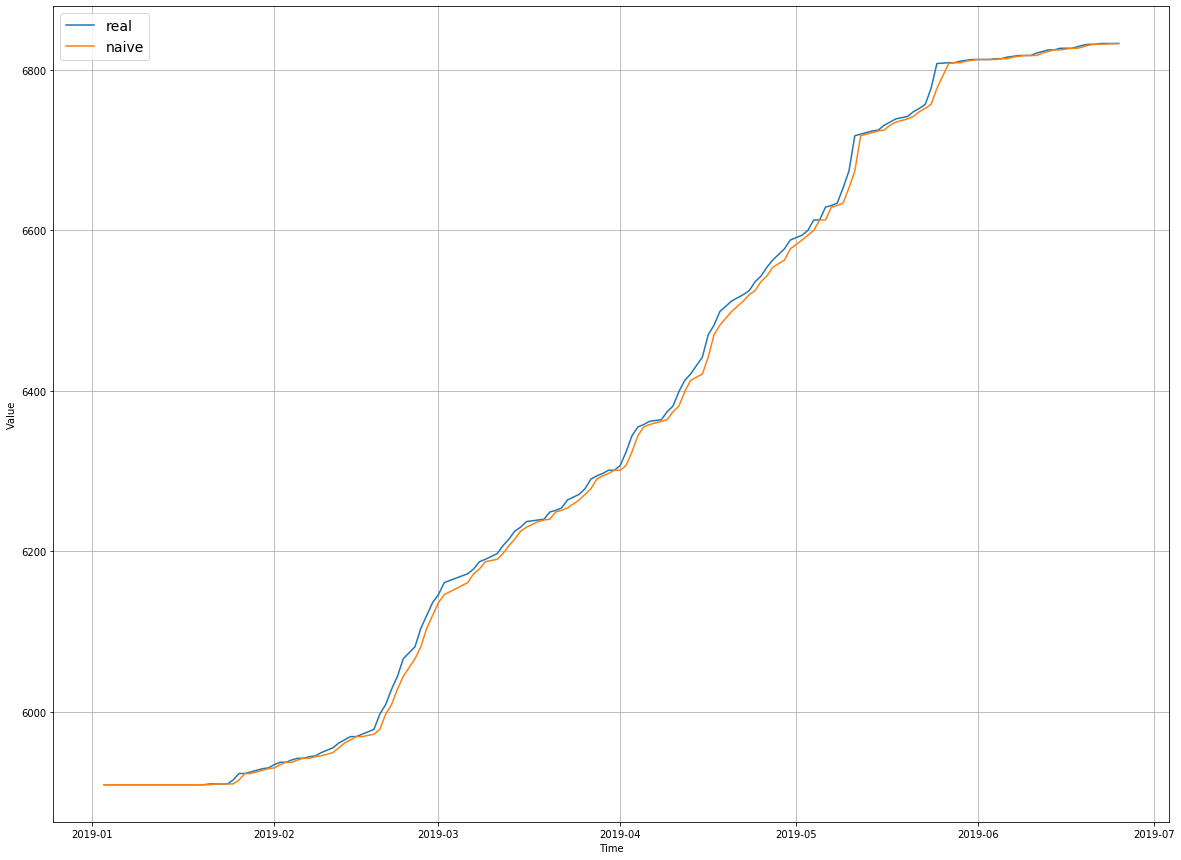

In [77]:
plt.figure(figsize=(20,15))
baseline_tools.plot_series(real.index, real, label="real")
baseline_tools.plot_series(real.index, naive, label="naive")
plt.show()

In [78]:
naive

2019-01-03    5909.0
2019-01-04    5909.0
2019-01-05    5909.0
2019-01-06    5909.0
2019-01-07    5909.0
               ...  
2019-06-19    6829.0
2019-06-20    6831.0
2019-06-21    6832.0
2019-06-22    6832.0
2019-06-25    6833.0
Name: VENTILADOR VF40 SILENCE FORCE CD RE, Length: 153, dtype: float64

In [79]:
real

2019-01-03    5909.0
2019-01-04    5909.0
2019-01-05    5909.0
2019-01-06    5909.0
2019-01-07    5909.0
               ...  
2019-06-19    6831.0
2019-06-20    6832.0
2019-06-21    6832.0
2019-06-22    6833.0
2019-06-25    6833.0
Name: VENTILADOR VF40 SILENCE FORCE CD RE, Length: 153, dtype: float64

In [80]:
real_reversed = reverse_cumsum(real, initial=train[-1]).values

In [81]:
naive_reversed = reverse_cumsum(naive, initial=test[0]).values

In [85]:
mean_absolute_error(real_reversed, naive_reversed).numpy()

3.895424836601307

In [84]:
mean_squared_error(real_reversed, naive_reversed).numpy()

45.64705882352941

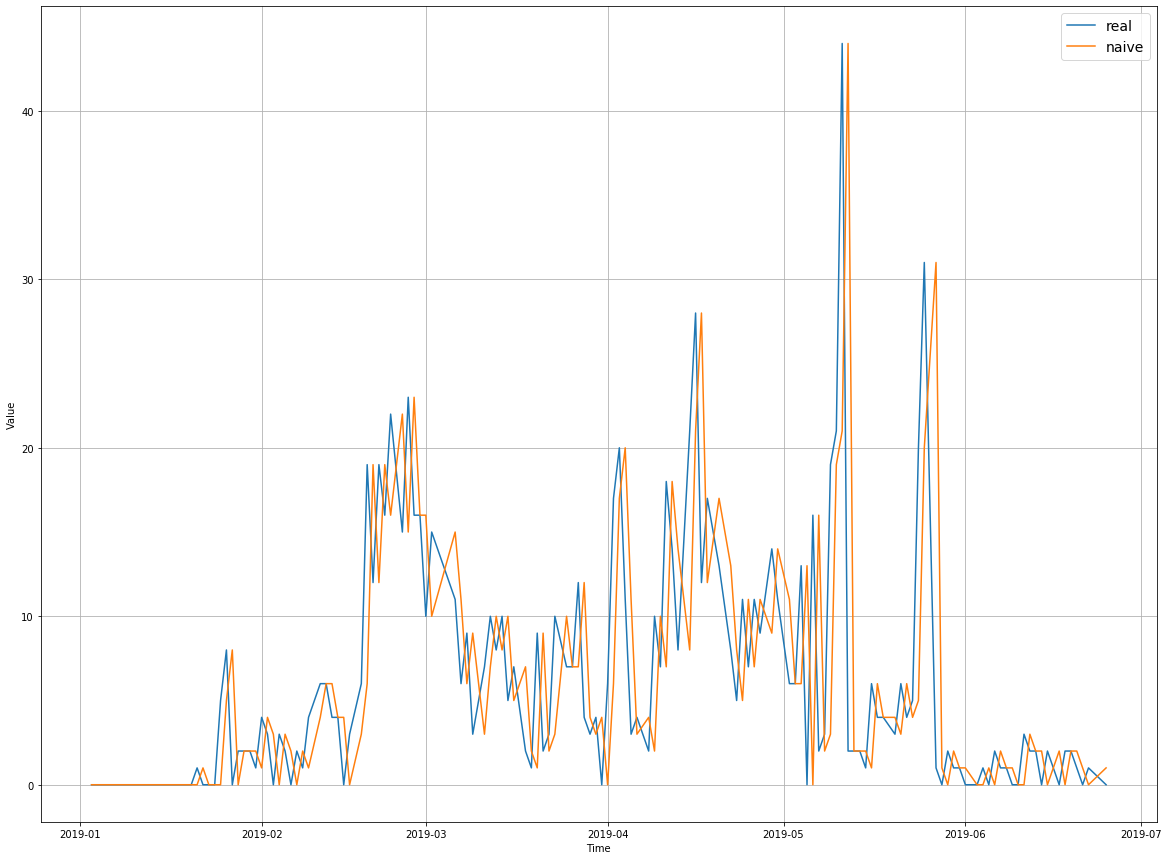

In [86]:
plt.figure(figsize=(20,15))
baseline_tools.plot_series(real.index, real_reversed, label="real")
baseline_tools.plot_series(real.index, naive_reversed, label="naive")
plt.show()